# Benchmark for query algorthems

## 1. getting the data

In [1]:
## /!\ to be executed only onses 
import sys
sys.path.insert(0, "..")

In [2]:
from wordtraveller import filemanager as fm
filemanager = fm.FileManager('test1' , '../workspace/'  )
Voc = filemanager.read_vocabulary()

print(len(Voc))

325354


In [3]:
print(Voc.pop("***NumberDifferentDocs***"))

131896


## 2. vocabulary analythis 
### a) gets the ten most frequant words

In [4]:
from sortedcontainers import SortedDict
worldsFreq = [0]*len(Voc)
priviousOffset = 0 
first = True
for i, world in enumerate(Voc): 
    worldsFreq[i] = (int(Voc[world]) -priviousOffset, world )
    priviousOffset = int(Voc[world])
worldsFreq.sort(reverse=True)
print(worldsFreq[0:10])

[(131997, '-'), (113786, '<number>'), (85006, 'said'), (62077, 'one'), (55571, 'two'), (54144, '--'), (52693, 'would'), (51461, 'also'), (50276, 'last'), (47889, 'new')]


### b) Zipf's low

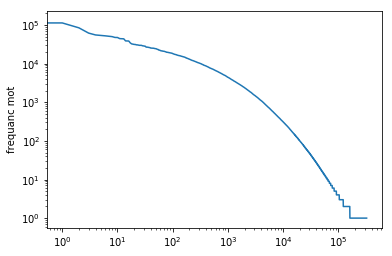

In [6]:
import matplotlib.pyplot as plt
from sortedcontainers import SortedDict
freqs = [0]*len(Voc)
priviousOffset = 0 
for i, world in enumerate(Voc): 
    freqs[i] = (Voc[world]) -priviousOffset
    priviousOffset = int(Voc[world])
freqs.sort(reverse=True)
plt.plot(freqs)
plt.ylabel('frequanc mot')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [87]:
from wordtraveller import query
from wordtraveller import faginsta, faginstopk
import time 
heighFreq = worldsFreq[10:100] #50 000 > x > 15 000
middelFreq = worldsFreq[1000:5000] # 4500 > x > 800 
lowFreq =worldsFreq[50000: 150000] # 17 > x > 2 
print(worldsFreq[3200]) 
#(4434, 'believes') (2077, 'coalition') (1434, 'matt')
#(6411, 'build')
#(7501, 'party') (6599, 'actually')(3802, 'jail') (4101, 'august')

#words = ['believes', 'coalition', 'matt']
#words= ['build']
words= ['party','actually','jail','august']
# getting the posting lists for a set of words
sartingTime = time.time()
posting_lists_ordered_by_id = SortedDict()
posting_lists_ordered_by_score = SortedDict()
for word in words:
    orderedById, orderedByScore = query.get_posting_list(
    Voc, word, filemanager, returnPostingListOrderedByScore = True)
    if orderedById and orderedByScore:
        posting_lists_ordered_by_score[word] = orderedByScore
        posting_lists_ordered_by_id[word] = orderedById
print( "time for creating posting lists {}".format(time.time() - sartingTime))


# get the time        
totaleTimeTA = [0]*10
for k in range(1,10):
    sartingTime = time.time()
    faginsta.find_fagins_ta(posting_lists_ordered_by_id, posting_lists_ordered_by_score, 0, k*k )
    totaleTimeTA[k] = time.time() - sartingTime
print( 'TA donne')
totaleTimefag = [0]*10
for k in range(1,10):   
    sartingTime = time.time()
    faginstopk.find_fagins_top_k(posting_lists_ordered_by_id, posting_lists_ordered_by_score, k*k )
    totaleTimefag[k] = time.time() - sartingTime
print( 'Fag donne')

(1434, 'matt')
time for creating posting lists 0.132523775100708
TA donne
Fag donne


In [88]:
from wordtraveller import naivetopk
totaleTimeNaiv = [0]*10
for k in range(1,10):   
    sartingTime = time.time()
    naivetopk.naive_top_k_algo(words, Voc, filemanager, 0, k*k )

    totaleTimeNaiv[k] = time.time() - sartingTime
    print (totaleTimeNaiv[k])
print( 'Anive donne')

#totaleTimefagFull = [0]*10
#for k in range(1,10):   
#    sartingTime = time.time()
#    faginstopk.apply_top_k_algo(words, Voc, filemanager, 0 , k*k)
#    totaleTimefagFull[k] = time.time() - sartingTime
#print( 'Fag donne')

#totaleTimeTAFull = [0]*10
#for k in range(1,10):
#    sartingTime = time.time()
#    faginsta.apply_fagins_ta(words, Voc, filemanager, 0, k*k)
#    totaleTimeTAFull[k] = time.time() - sartingTime
#print( 'TA donne')

0.32848215103149414
0.37493109703063965
0.3630976676940918
0.2777416706085205
0.414050817489624
0.37380075454711914
0.29110240936279297
0.3816213607788086
0.39675068855285645
Anive donne


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


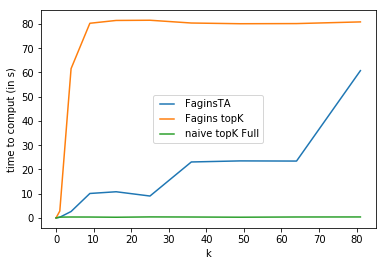

In [89]:
x = [0]*10
for i in range(1,10): 
    x[i] = i*i
    

print (x)
plt.plot(x,totaleTimeTA, label="FaginsTA")
plt.plot(x,totaleTimefag, label="Fagins topK")
#lt.plot(x,totaleTimeTAFull, label="FaginsTA Full")
#lt.plot(x,totaleTimefagFull, label="Fagins topK Full")
plt.plot(x,totaleTimeNaiv, label="naive topK Full")

plt.ylabel('time to comput (in s)')
plt.xlabel('k')
plt.legend(numpoints=2)
plt.show()